<a href="https://colab.research.google.com/github/IlTACK-OH/practical_statistics_for_data_scientists/blob/main/day2_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.5.2 도수분포표와 히스토그램

In [2]:
state = pd.read_csv('state.csv')

In [3]:
binnedPopulation = pd.cut(state['Population'],10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Populatin (millions)')

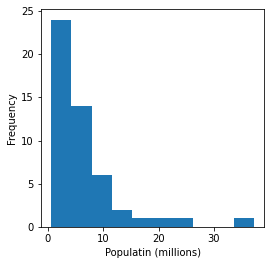

In [4]:
ax =(state['Population']/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel('Populatin (millions)')

# 1.5.3 밀도 그림과 추정

Text(0.5, 0, 'Murder Rate (per 100,000)')

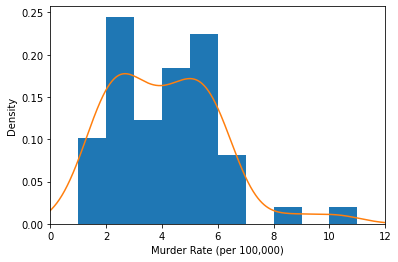

In [5]:
ax = state['Murder.Rate'].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

# 1.6 이진 데이터와 범주 데이터 탐색하기

In [6]:
dfw = pd.read_csv('dfw_airline.csv')

Text(0, 0.5, 'Count')

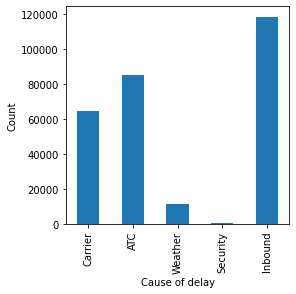

In [7]:
ax = dfw.transpose().plot.bar(figsize=(4,4),legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

# 2.3 통계학에서의 표본분포

In [8]:
import pandas as pd
import seaborn as sns

In [9]:
loans_income = pd.read_csv('loans_income.csv')

# 2.4 부스트트랩

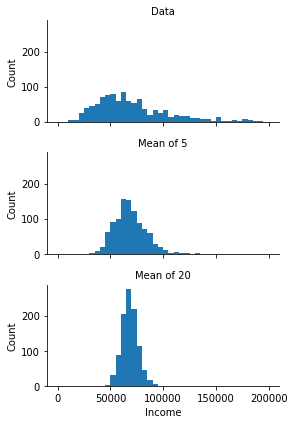

In [10]:
sample_data = pd.DataFrame({'income':loans_income.sample(1000)['x'],'type':'Data'})
sample_mean_05 = pd.DataFrame({'income':[loans_income.sample(5).mean()['x'] for _ in range(1000)],
                               'type':'Mean of 5'})
sample_mean_20 = pd.DataFrame({'income':[loans_income.sample(20).mean()['x'] for _ in range(1000)],
                               'type':'Mean of 20'})
results = pd.concat([sample_data,sample_mean_05,sample_mean_20])

g = sns.FacetGrid(results,col='type',col_wrap=1,height=2,aspect=2)
g.map(plt.hist,'income',range=[0,200000],bins=40)
g.set_axis_labels('Income','Count')
g.set_titles('{col_name}')


In [11]:
pip install scikit-learn;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import sklearn.utils

In [13]:
results=[]
for nrepeat in range(1000):
  sample = sklearn.utils.resample(loans_income)
  results.append(sample.median())
results = pd.Series(results)

In [18]:
print('Bootstrap Statistics')
print(f'original:{loans_income.median().x}')
print(f'bias:{results.mean() - loans_income.median().x}')
print(f'std.error:{results.std()}')

Bootstrap Statistics
original:62000.0
bias:-68.30200000000332
std.error:208.14727979506745


# 2.6.1 표준정규분포와 QQ그림

In [21]:
from scipy.stats import norm,probplot

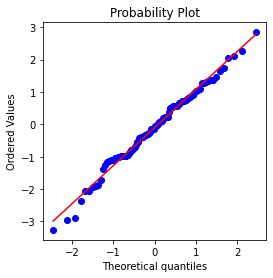

In [24]:
fig,ax = plt.subplots(figsize=(4,4))
norm_sample = norm.rvs(size=100)
probplot(norm_sample,plot=ax);

# 2.9 이항분포

In [25]:
from scipy.stats import binom

In [26]:
binom.pmf(2,n=5,p=0.1)

0.07289999999999992

In [27]:
binom.cdf(2,n=5,p=0.1)

0.99144